In [1]:
from google.colab import drive #Mounts google drive to colab
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os #Allows us to import Kaggle datasets to google drive
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [3]:
!kaggle datasets download -d rounakbanik/the-movies-dataset --unzip #Downloads the dataset to google drive

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
100% 227M/228M [00:03<00:00, 41.9MB/s]
100% 228M/228M [00:03<00:00, 60.8MB/s]


In [4]:
import pandas as pd #Imports the dataset to colab
data = pd.read_csv('/content/movies_metadata.csv')

<ipython-input-4-8c4bbe05742c>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/movies_metadata.csv')


In [5]:
data.columns #Shows us the columns of dataframe

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
sample_movie = data.iloc[:, :][['title', 'budget', 'vote_average', 'vote_count']] #We choose the columns we want to form clusters with
sample_movie

,title,budget,vote_average,vote_count
0,Toy Story,30000000,7.7,5415.0
1,Jumanji,65000000,6.9,2413.0
2,Grumpier Old Men,0,6.5,92.0
3,Waiting to Exhale,16000000,6.1,34.0
4,Father of the Bride Part II,0,5.7,173.0
...,...,...,...,...
45461,Subdue,0,4.0,1.0
45462,Century of Birthing,0,9.0,3.0
45463,Betrayal,0,3.8,6.0
45464,Satan Triumphant,0,0.0,0.0


In [7]:
sample_movie = sample_movie[(sample_movie['vote_count'] > 6000)] #We remove all observations with less than 6000 vote counts and no information about budget
sample_movie['budget'] = pd.to_numeric(sample_movie['budget'], errors='coerce') #This line transforms the budget column from an object to an integer
sample_movie = sample_movie[(sample_movie['budget'] != 0)]
sample_movie

<ipython-input-7-c1b5eb701398>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_movie['budget'] = pd.to_numeric(sample_movie['budget'], errors='coerce') #This line transforms the budget column from an object to an integer


,title,budget,vote_average,vote_count
256,Star Wars,11000000,8.1,6778.0
292,Pulp Fiction,8000000,8.3,8670.0
314,The Shawshank Redemption,25000000,8.5,8358.0
351,Forrest Gump,55000000,8.2,8147.0
834,The Godfather,6000000,8.5,6024.0
...,...,...,...,...
30315,Inside Out,175000000,7.9,6737.0
30543,Suicide Squad,175000000,5.9,7717.0
31072,Batman v Superman: Dawn of Justice,250000000,5.7,7189.0
31865,The Revenant,135000000,7.3,6558.0


In [8]:
sample_movie[['budget', 'vote_average', 'vote_count']].values

array([[1.1000e+07, 8.1000e+00, 6.7780e+03],
       [8.0000e+06, 8.3000e+00, 8.6700e+03],
       [2.5000e+07, 8.5000e+00, 8.3580e+03],
       [5.5000e+07, 8.2000e+00, 8.1470e+03],
       [6.0000e+06, 8.5000e+00, 6.0240e+03],
       [1.9000e+07, 8.0000e+00, 6.2390e+03],
       [2.0000e+08, 7.5000e+00, 7.7700e+03],
       [6.3000e+07, 7.9000e+00, 9.0790e+03],
       [6.3000e+07, 8.3000e+00, 9.6780e+03],
       [1.1500e+08, 7.5000e+00, 6.1500e+03],
       [1.2500e+08, 7.5000e+00, 7.1880e+03],
       [9.3000e+07, 8.0000e+00, 8.8920e+03],
       [7.9000e+07, 8.0000e+00, 7.6410e+03],
       [9.4000e+07, 7.6000e+00, 6.2920e+03],
       [1.4000e+08, 7.5000e+00, 7.1910e+03],
       [9.4000e+07, 8.1000e+00, 8.2260e+03],
       [1.3000e+08, 7.7000e+00, 6.0370e+03],
       [1.5000e+08, 7.5000e+00, 7.5110e+03],
       [1.8500e+08, 8.3000e+00, 1.2269e+04],
       [1.4000e+08, 7.4000e+00, 8.9510e+03],
       [1.8000e+08, 7.8000e+00, 6.4390e+03],
       [7.0000e+07, 7.9000e+00, 6.5980e+03],
       [1.

In [9]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering().fit(sample_movie[['budget', 'vote_average', 'vote_count']].values)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [10.0, 10.0, 46.25, 46.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [82.5, 82.5, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [97.5, 97.5, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [162.5, 162.5, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [176.25, 176.25, 221.875, 221.875],
  [118.75, 118.75, 199.0625, 199.0625],
  [28.125, 28.125, 158.90625, 158.90625],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0

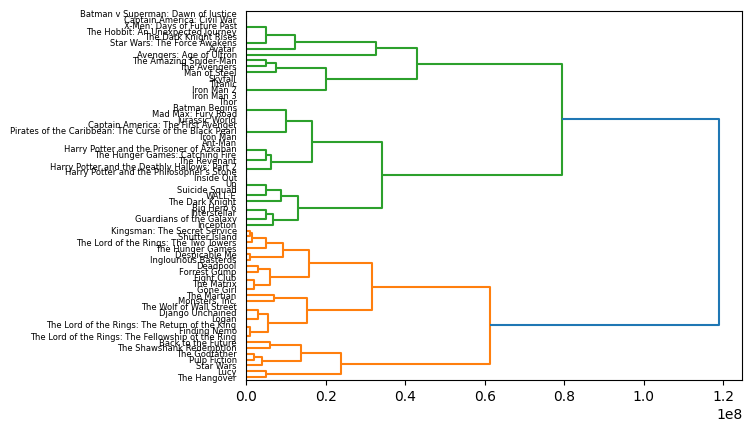

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram #We make a dendrogram, giving us a visual representation of the clustering
import matplotlib.pyplot as plt
linkage_matrix = linkage(sample_movie[['budget', 'vote_average', 'vote_count']], method='average')

dendrogram(linkage_matrix, labels=sample_movie['title'].tolist(), orientation='right')

In [11]:
sample_movie.shape

(63, 4)

In [12]:
sample_movie['cluster'] = sample_movie.index
sample_movie.head()

,title,budget,vote_average,vote_count,cluster
256,Star Wars,11000000,8.1,6778.0,256
292,Pulp Fiction,8000000,8.3,8670.0,292
314,The Shawshank Redemption,25000000,8.5,8358.0,314
351,Forrest Gump,55000000,8.2,8147.0,351
834,The Godfather,6000000,8.5,6024.0,834


<ipython-input-13-9ff4dd36edc8>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cluster_colors = plt.cm.get_cmap('tab10', num_clusters)  # Use a colormap for distinct colors
<ipython-input-13-9ff4dd36edc8>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(row['vote_average'], row['budget'], c=cluster_colors(cluster_id), label=row['title'])


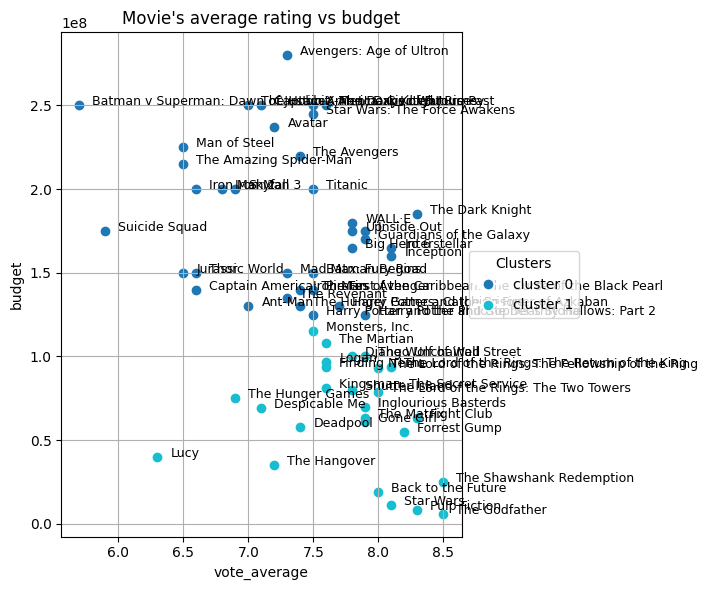

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(sample_movie[['budget', 'vote_average', 'vote_count']].values)
sample_movie['cluster'] = clustering.labels_

# Determine the number of clusters
num_clusters = len(sample_movie['cluster'].unique())

# Assign each cluster a color
cluster_colors = plt.cm.get_cmap('tab10', num_clusters)  # Use a colormap for distinct colors

# Assign each cluster a color
cluster_labels = [f'cluster {i}' for i in range(num_clusters)]

# Create figure and axis with additional space for legend
plt.figure(figsize=(8,6))

# Plot each point with corresponding color based on the cluster
# Use iterrows() to iterate over rows and access cluster ID based on index
for index, row in sample_movie.iterrows():
    cluster_id = row['cluster']
    plt.scatter(row['vote_average'], row['budget'], c=cluster_colors(cluster_id), label=row['title'])
    plt.text(row['vote_average'] + 0.1, row['budget'], row['title'], fontsize=9)

# Title and labels
plt.title("Movie's average rating vs budget")
plt.xlabel("vote_average")
plt.ylabel("budget")

# Create a legend to show the cluster colors outside the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors(i), markersize=8) for i in range(num_clusters)]
plt.legend(handles, cluster_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Clusters')

# Display the plot
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to fit the legend
plt.show()

After the hierarchical clustering is done, we can try to do the K-means clustering.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = sample_movie[['vote_average', 'budget']].values
movie_titles = sample_movie['title'].values

k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

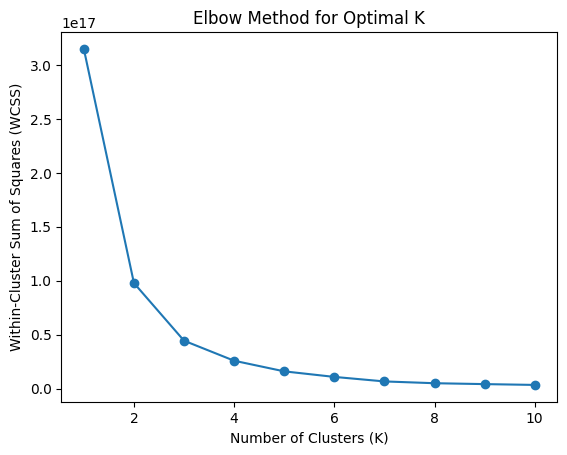

In [15]:
wcss = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
print(X)

[[8.10e+00 1.10e+07]
 [8.30e+00 8.00e+06]
 [8.50e+00 2.50e+07]
 [8.20e+00 5.50e+07]
 [8.50e+00 6.00e+06]
 [8.00e+00 1.90e+07]
 [7.50e+00 2.00e+08]
 [7.90e+00 6.30e+07]
 [8.30e+00 6.30e+07]
 [7.50e+00 1.15e+08]
 [7.50e+00 1.25e+08]
 [8.00e+00 9.30e+07]
 [8.00e+00 7.90e+07]
 [7.60e+00 9.40e+07]
 [7.50e+00 1.40e+08]
 [8.10e+00 9.40e+07]
 [7.70e+00 1.30e+08]
 [7.50e+00 1.50e+08]
 [8.30e+00 1.85e+08]
 [7.40e+00 1.40e+08]
 [7.80e+00 1.80e+08]
 [7.90e+00 7.00e+07]
 [7.80e+00 1.75e+08]
 [7.20e+00 3.50e+07]
 [7.20e+00 2.37e+08]
 [7.80e+00 8.00e+07]
 [6.60e+00 2.00e+08]
 [7.10e+00 6.90e+07]
 [8.10e+00 1.60e+08]
 [6.60e+00 1.50e+08]
 [7.90e+00 1.25e+08]
 [6.60e+00 1.40e+08]
 [7.40e+00 2.20e+08]
 [6.90e+00 7.50e+07]
 [7.60e+00 2.50e+08]
 [6.50e+00 2.15e+08]
 [6.90e+00 2.00e+08]
 [7.00e+00 2.50e+08]
 [7.80e+00 1.00e+08]
 [6.80e+00 2.00e+08]
 [6.50e+00 2.25e+08]
 [7.40e+00 1.30e+08]
 [7.90e+00 1.00e+08]
 [8.10e+00 1.65e+08]
 [6.30e+00 4.00e+07]
 [7.50e+00 2.50e+08]
 [7.90e+00 6.10e+07]
 [7.90e+00 1.

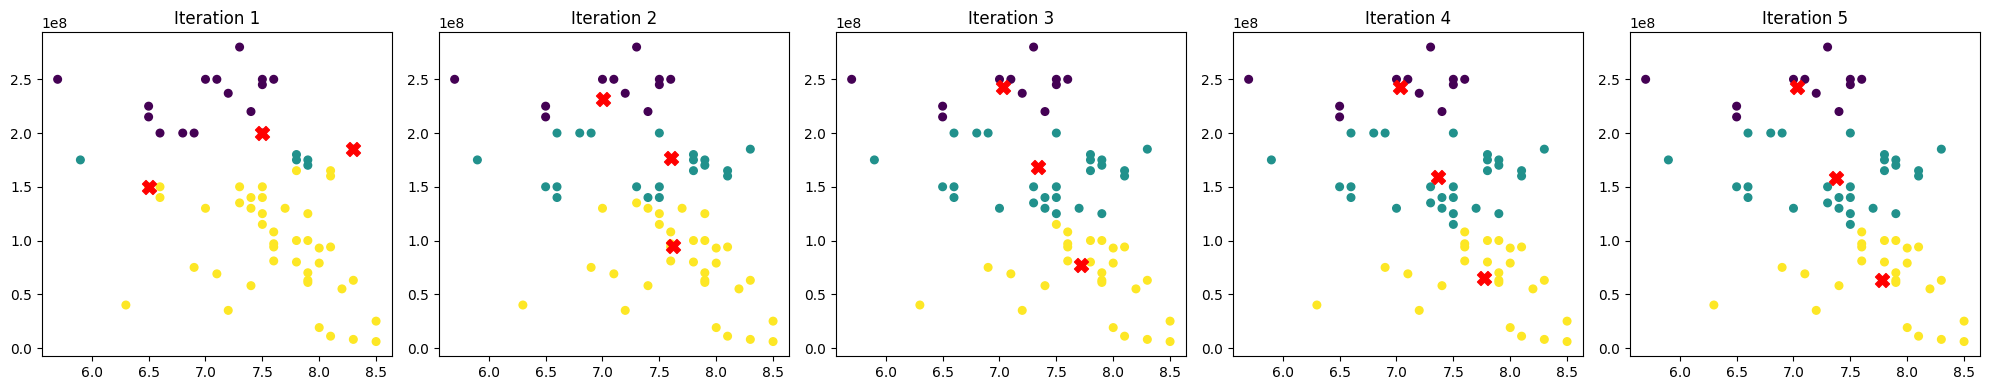

In [17]:
def kmeans_with_visualization(X, k, max_iters=10):
    # Step 1: Initialization - Randomly initialize k centroids from your defined X
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]

    iteration_visualizations = []

    for i in range(max_iters):
        # Step 2: Assignment - Assign each point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Capture current state for visualization
        iteration_visualizations.append((centroids.copy(), labels.copy()))

        # Step 3: Update Centroids - Recalculate centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return iteration_visualizations

# Run k-means algorithm and capture the output at each iteration using your defined X
iteration_visualizations = kmeans_with_visualization(X, k=3)

# Plot the clusters and centroids at each iteration
fig, axes = plt.subplots(1, len(iteration_visualizations), figsize=(20, 4))
for i, (centroids, labels) in enumerate(iteration_visualizations):
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
    axes[i].set_title(f"Iteration {i + 1}")

plt.tight_layout()
plt.show()

We have now shown the k-means clustering as well. We now want to build a recommendation engine, that can recommend a movie, by choosing the closest movie to the input movie.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
movie_scaled = scaler.fit_transform(sample_movie[['vote_average', 'budget']])

In [19]:
from sklearn.metrics.pairwise import cosine_distances

distance_matrix = cosine_distances(movie_scaled[:, [0, 1]])
distance_matrix.shape

(63, 63)

In [20]:
np.fill_diagonal(distance_matrix, 1)

In [21]:
distance_df = pd.DataFrame(distance_matrix, index=sample_movie['title'], columns=sample_movie['title'])
distance_df

title,Star Wars,Pulp Fiction,The Shawshank Redemption,Forrest Gump,The Godfather,Back to the Future,Titanic,The Matrix,Fight Club,"Monsters, Inc.",...,Avengers: Age of Ultron,Ant-Man,Deadpool,Captain America: Civil War,The Martian,Inside Out,Suicide Squad,Batman v Superman: Dawn of Justice,The Revenant,Logan
title,,,,,,,,,,,,,,,,,,,,,
Star Wars,1.000000,0.006805,0.043228,0.039223,0.023160,0.001043,1.838888,0.002523,0.077485,0.073048,...,1.924657,1.422831,0.199102,1.986044,0.000696,1.147061,1.677297,1.861179,1.498109,0.013579
Pulp Fiction,0.006805,1.000000,0.015867,0.013464,0.004888,0.013158,1.769790,0.001043,0.038813,0.123050,...,1.874017,1.525492,0.274289,1.959944,0.011842,1.030866,1.758370,1.914516,1.595705,0.039419
The Shawshank Redemption,0.043228,0.015867,1.000000,0.000099,0.003156,0.057505,1.644319,0.024995,0.005111,0.222237,...,1.773934,1.668114,0.407879,1.894997,0.054748,0.853026,1.861993,1.971786,1.728768,0.103987
Forrest Gump,0.039223,0.013464,0.000099,1.000000,0.002136,0.052887,1.655036,0.021960,0.006633,0.213453,...,1.782785,1.657559,0.396578,1.901197,0.050241,0.866985,1.854761,1.968364,1.719042,0.097817
The Godfather,0.023160,0.004888,0.003156,0.002136,1.000000,0.033948,1.702994,0.010434,0.016266,0.174795,...,1.821762,1.606941,0.345778,1.927583,0.031825,0.932010,1.819032,1.949996,1.672111,0.071567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Inside Out,1.147061,1.030866,0.853026,0.866985,0.932010,1.192067,0.338247,1.076469,0.753902,1.507421,...,0.487359,1.834174,1.710072,0.690314,1.183870,1.000000,1.628106,1.376130,1.784434,1.307516
Suicide Squad,1.677297,1.758370,1.861993,1.854761,1.819032,1.643002,0.832272,1.727819,1.908772,1.351798,...,0.653890,0.046912,1.101902,0.454642,1.649372,1.628106,1.000000,0.042763,0.024688,1.547269
Batman v Superman: Dawn of Justice,1.861179,1.914516,1.971786,1.968364,1.949996,1.837074,0.554238,1.895092,1.990635,1.607565,...,0.397266,0.175239,1.385344,0.235466,1.841611,1.376130,0.042763,1.000000,0.130283,1.766002


In [25]:
from sklearn.preprocessing import LabelEncoder

le_movie = LabelEncoder()
le_movie.fit(sample_movie['title'])

movie_index = 1  # Change to index instead of titles (0 = Star Wars)

#find similar movies using np.argsort
similar_movies = np.argsort(distance_matrix[movie_index,:])[:5]

# Inverse transformation to get the movie titles
recommended_movies = le_movie.inverse_transform(similar_movies)

# Output the recommended movies
print("Recommended Movies:", recommended_movies)

Recommended Movies: ['Inglourious Basterds' 'Iron Man 2' 'Captain America: Civil War'
 'The Hangover' 'Batman Begins']
